(512, 512)
uint8


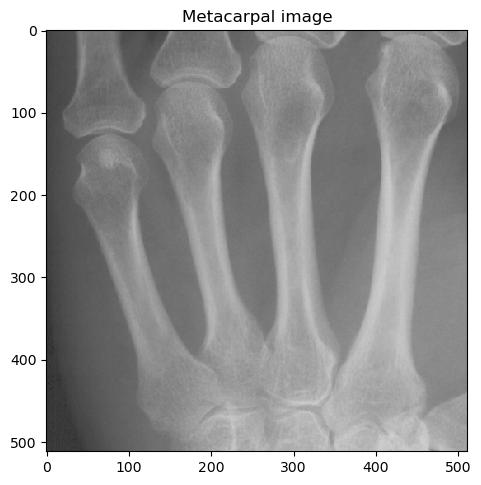

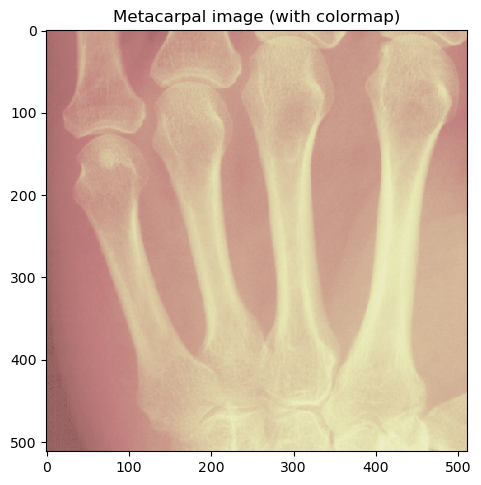

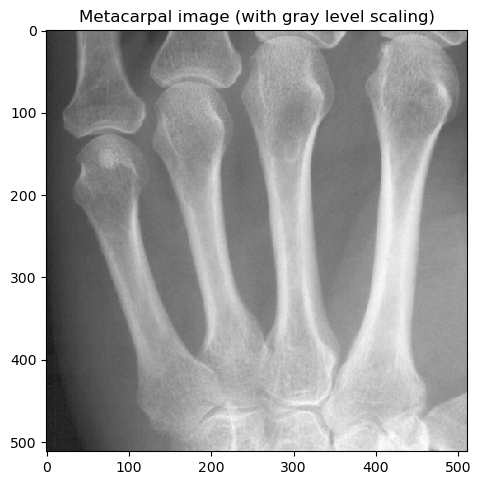

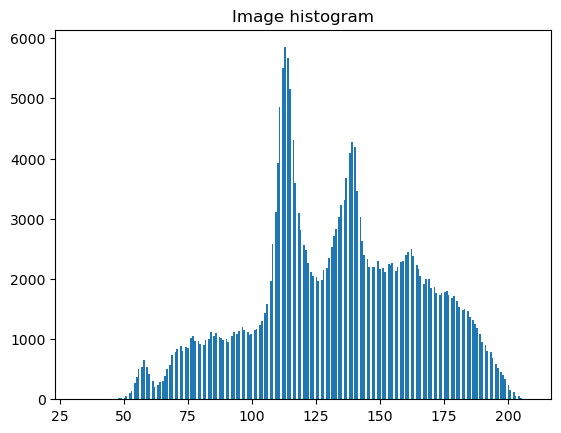

There are 1147.0 pixel values in bin 100
Bin edges: 100.75 to 101.4375
The most in any bin are in bin 117 with 5848.0, these values are within 112.4375 and 113.125
The pixel value at (r,c) = (110, 90) is: 120


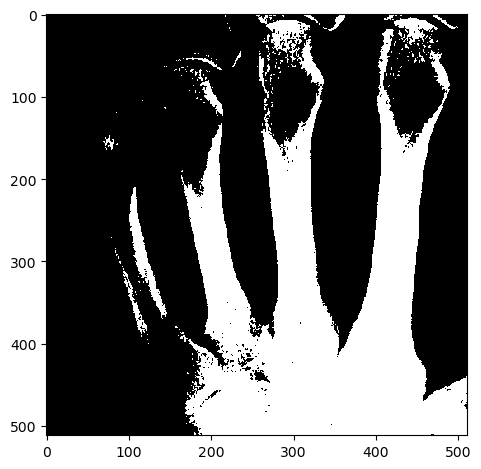

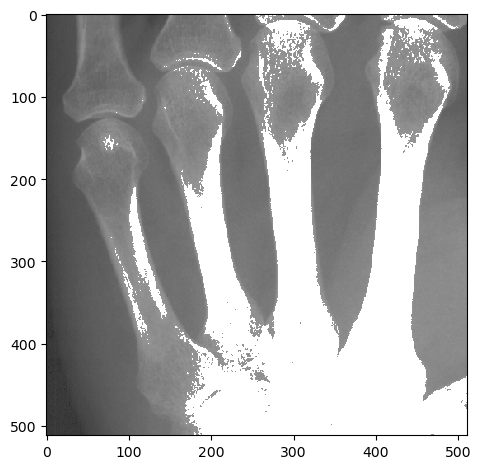

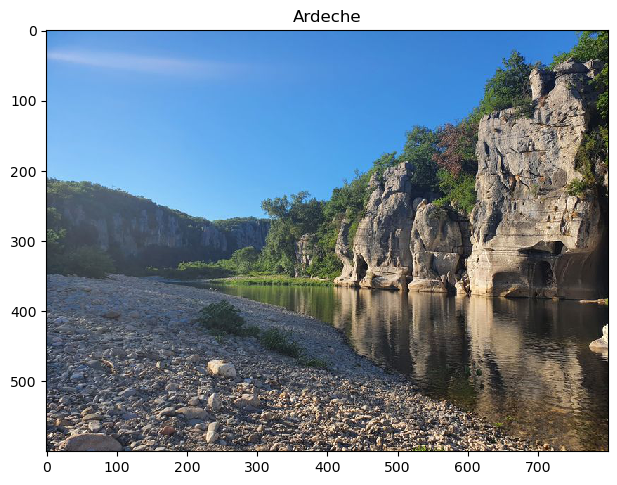

(600, 800, 3)
uint8
There are 600 rows and 800 columns
The pixel value (R,G,B) at (r,c) = (110, 90) is: [119 178 238]


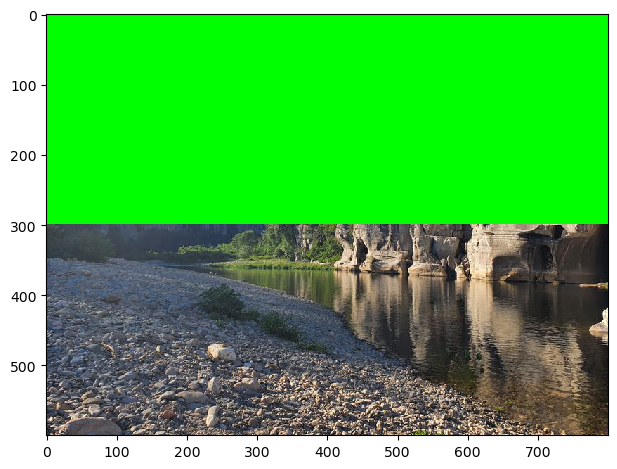




Own Image: FUN DENMARK THING


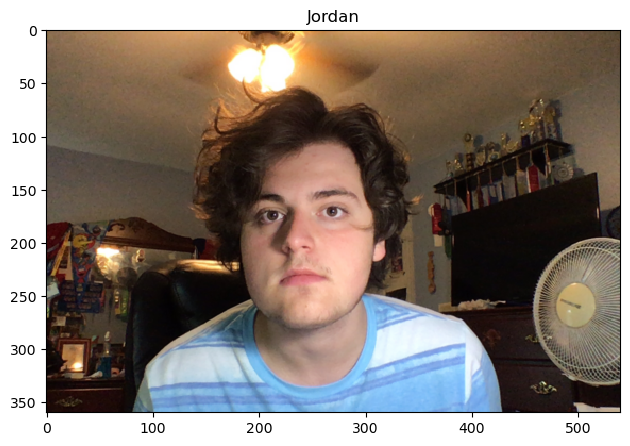

Before: uint8
After: float64
Rescaled Size: (360, 540, 3)
The pixel value at (r,c) in the original = (100, 360) is: [165 126  87]
The pixel value at (r,c) in rescaled = (25, 90) is: [0.64997134 0.4949088  0.35027358]


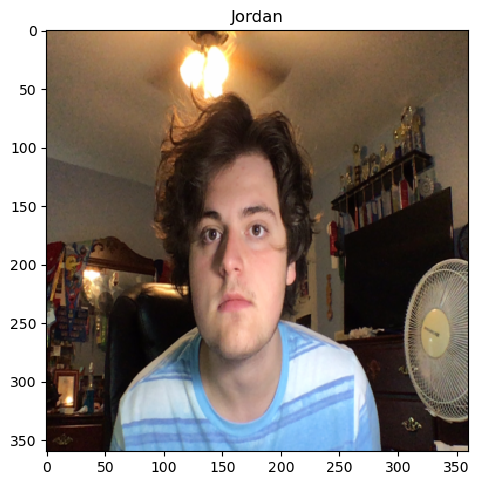

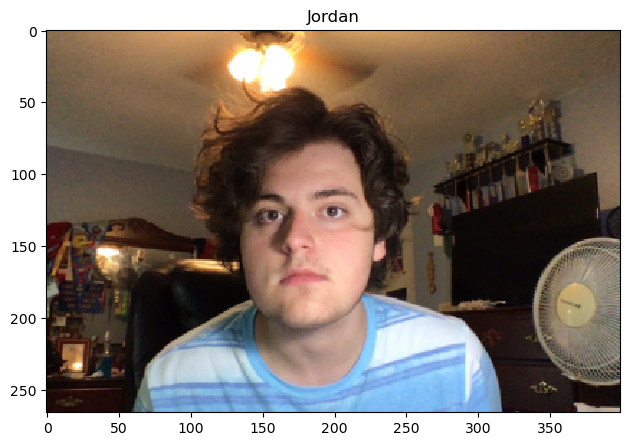

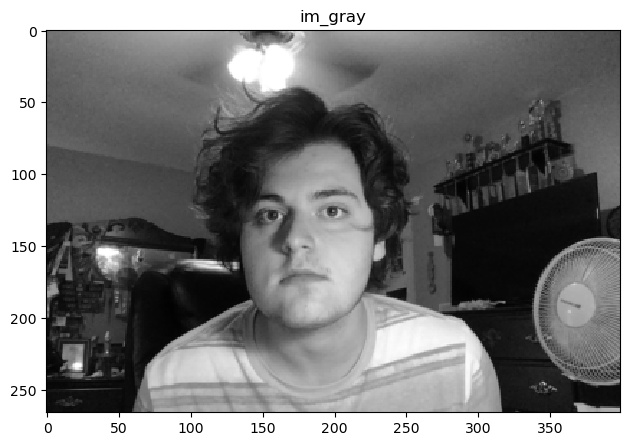

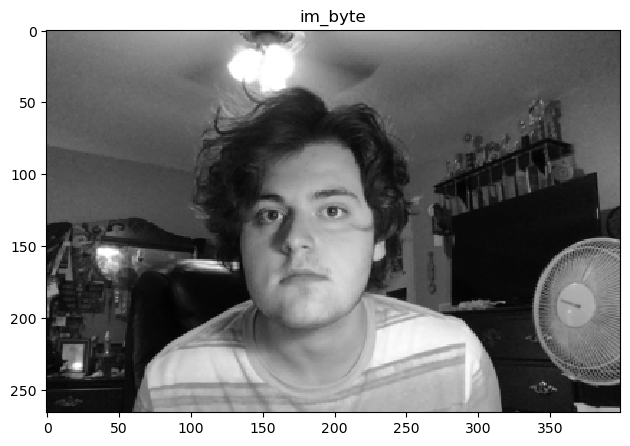

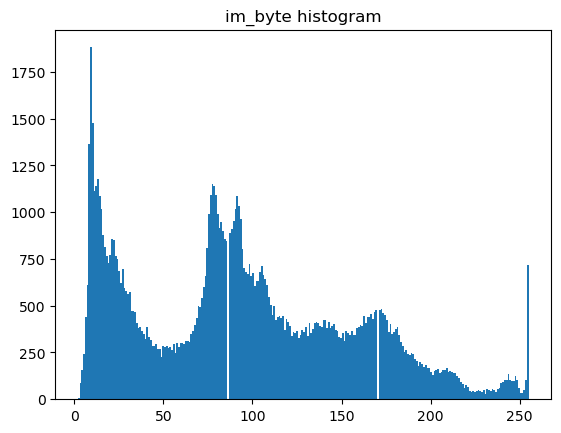

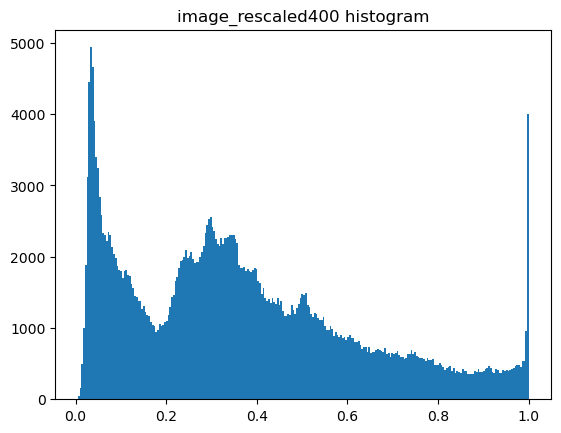

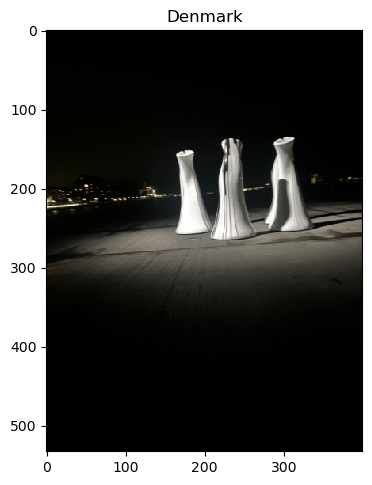

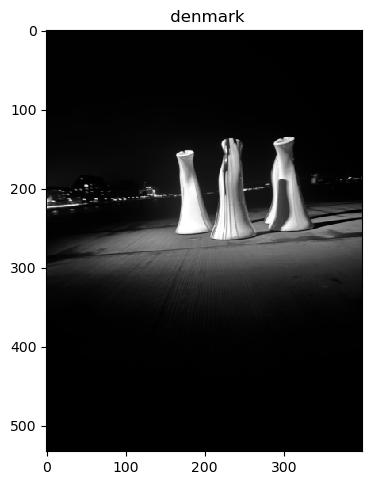

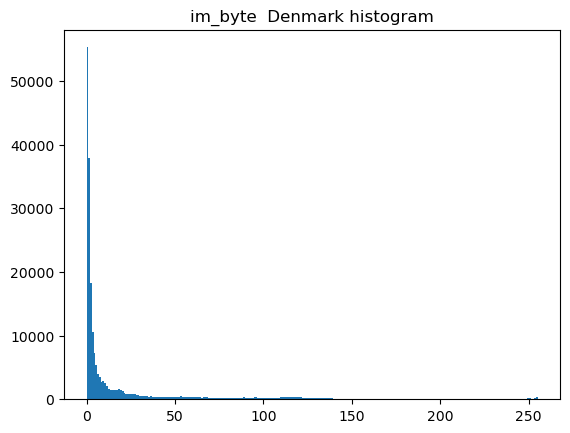

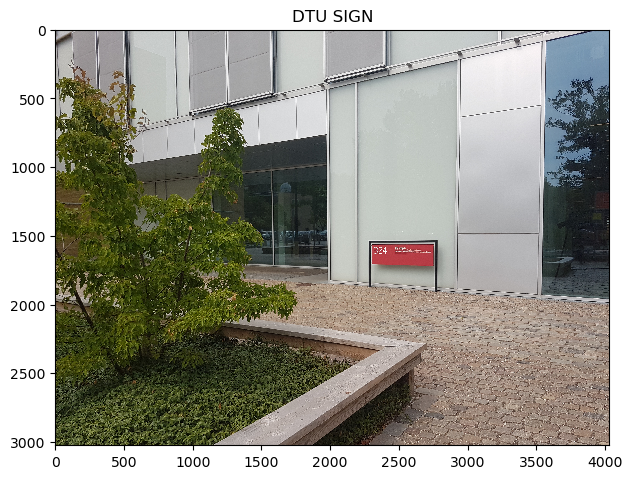

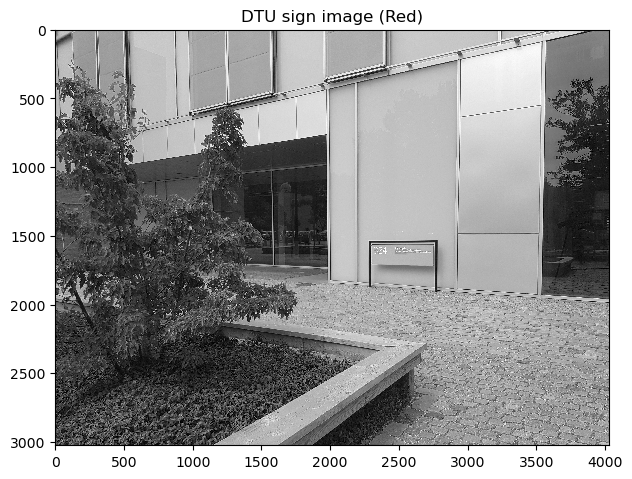

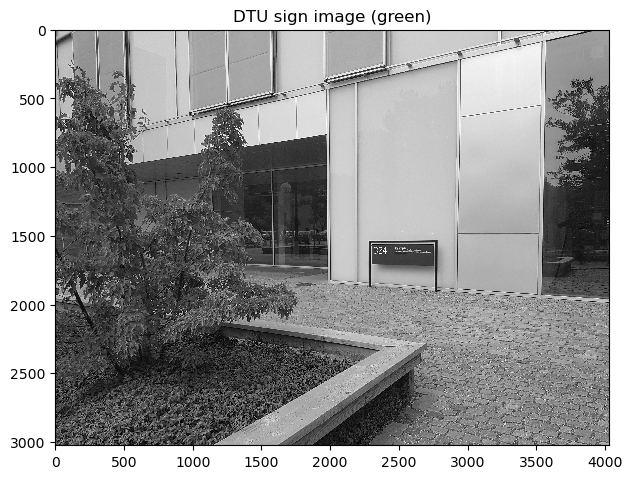

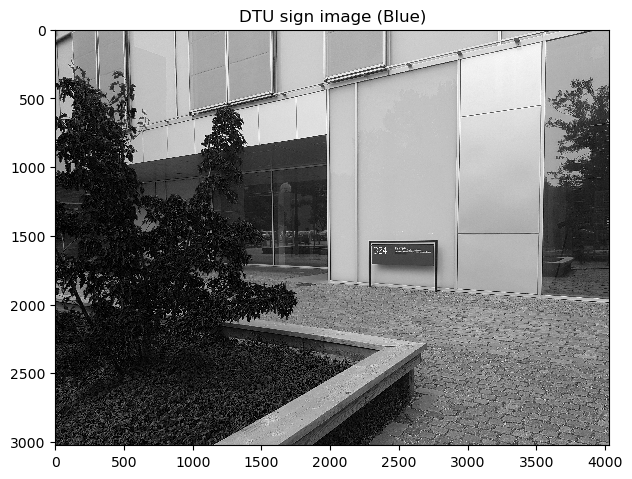

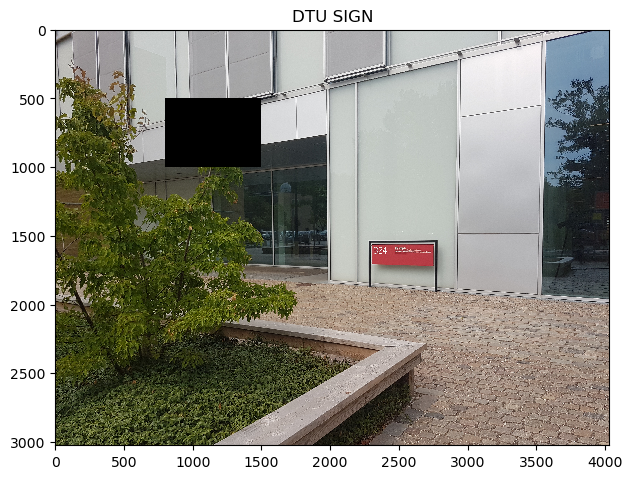

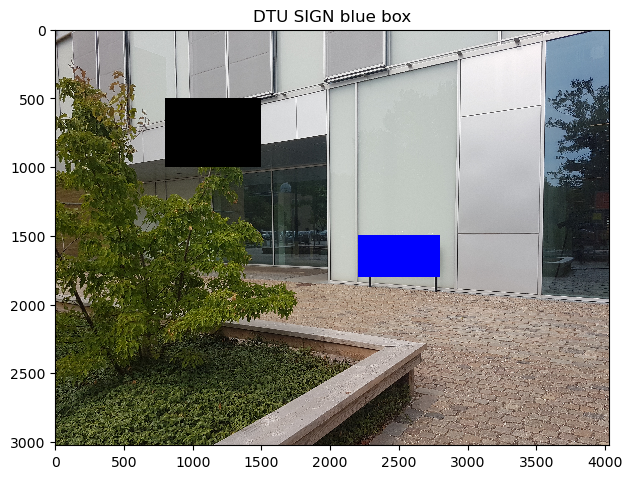

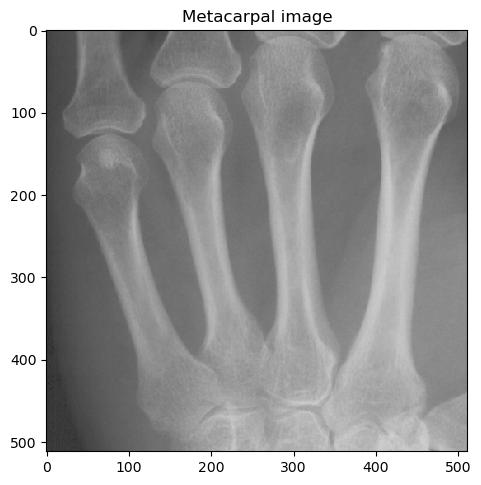

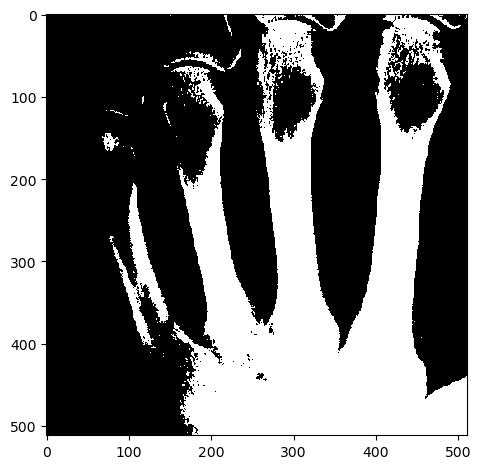

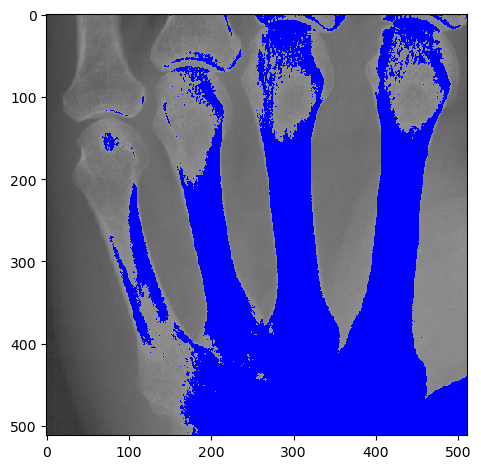

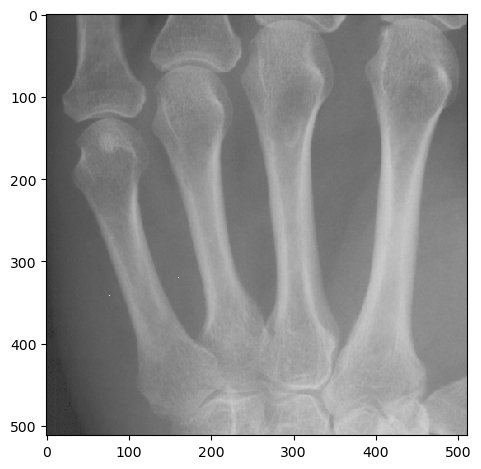

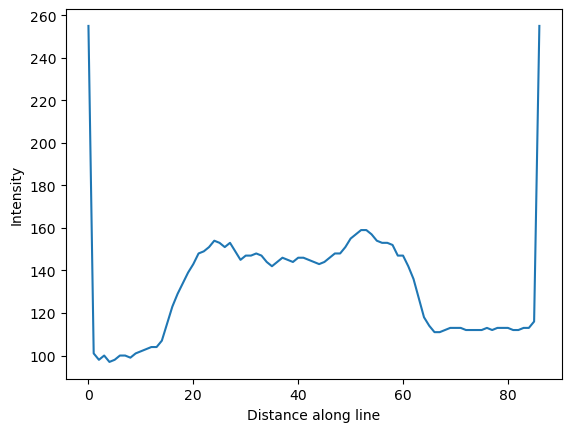

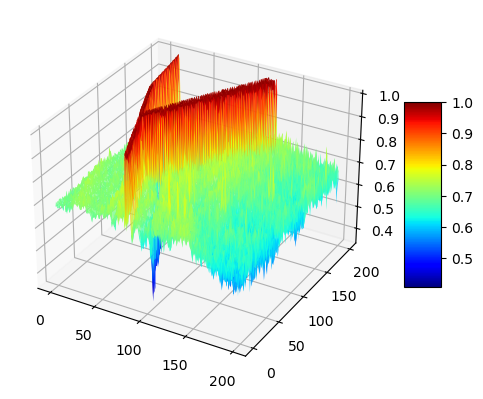

In [11]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

def rescale400(im_orig):
    finalWidth = 400.00
    origWidth = im_orig.shape[1]
    scaleFactor = origWidth/finalWidth
    image_resized = resize(im_org, (im_org.shape[0] // scaleFactor,
                       im_org.shape[1] // scaleFactor),
                       anti_aliasing=True)
    return image_resized
    
    
    
    




# Directory containing data and images
in_dir = "/Users/jordan/Documents/GitHub/DTUImageAnalysis/exercises/ex1-IntroductionToImageAnalysis/data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)


print(im_org.shape)
print(im_org.dtype)


io.imshow(im_org)
plt.title('Metacarpal image')
io.show()
# I do not know how to zoom and find the highest and lowest pixel values

#Colormap
io.imshow(im_org, cmap="pink")
plt.title('Metacarpal image (with colormap)')
io.show()

#grayscale
raw = np.asarray(im_org)
maximum = np.max(raw)
minimum = np.min(raw)
io.imshow(im_org, vmin=minimum, vmax=maximum)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

#histogram
h=plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")
bin_left = h[1][bin_no]
bin_right = h[1][bin_no + 1]
print(f"Bin edges: {bin_left} to {bin_right}")
index = np.argmax(h[0])
maximumInABin=h[0][index]
maximum_bin_left = h[1][index]
maximum_bin_right = h[1][index+1]
print(f"The most in any bin are in bin {index} with {maximumInABin}, these values are within {maximum_bin_left} and {maximum_bin_right}")

#Pixel values
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")


#clears the top 30 pixels of image
#im_org[:30] = 0
#io.imshow(im_org)
#io.show()


#Mask
mask = im_org > 150
io.imshow(mask)
io.show()


#what does this do??? -> the pixels that are white in the mask above show as white, but the rest looks like it does in the original
im_org[mask] = 255
io.imshow(im_org)
io.show()








##################
print()
print()



im_name = "ardeche.jpg"
im_org = io.imread(in_dir + im_name)
io.imshow(im_org)
plt.title('Ardeche')
io.show()

print(im_org.shape)
dims=im_org.shape
print(im_org.dtype)
print(f"There are {dims[0]} rows and {dims[1]} columns")
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value (R,G,B) at (r,c) = ({r}, {c}) is: {im_val}")

#Assign a value to a pixel
r = 500
c = 91
im_org[r, c] = [255, 0, 0]


#make the top half green
topHalf =round(dims[0]/2)

im_org[:topHalf] = (0,255,0)
io.imshow(im_org)
io.show()



##########################
print()
print()
print()
print("Own Image: FUN DENMARK THING")
im_name = "HACC ID.jpg"
im_org = io.imread(in_dir + im_name)
image_rescaled = rescale(im_org, 0.25, anti_aliasing=True,
                         channel_axis=2)

io.imshow(image_rescaled)
plt.title('Jordan')
io.show()
print(f"Before: {im_org.dtype}")
print(f"After: {image_rescaled.dtype}")
print(f"Rescaled Size: {image_rescaled.shape}")
#Differences in color values
r = 100
c = 360
im_val = im_org[r, c]
print(f"The pixel value at (r,c) in the original = ({r}, {c}) is: {im_val}")
r = 25
c = 90
im_val = image_rescaled[r, c]
print(f"The pixel value at (r,c) in rescaled = ({r}, {c}) is: {im_val}")
######IT seems that the uint8 is aproximately 256 times more or something like that

#resizing for diff sizes
image_resized = resize(im_org, (im_org.shape[0] // 4,
                       im_org.shape[1] // 6),
                       anti_aliasing=True)


io.imshow(image_resized)
plt.title('Jordan')
io.show()

image_rescaled400 = rescale400(im_org)
io.imshow(image_rescaled400)
plt.title('Jordan')
io.show()

im_gray = color.rgb2gray(image_rescaled400)
im_byte = img_as_ubyte(im_gray)
io.imshow(im_gray)
plt.title('im_gray')
io.show()

io.imshow(im_byte)
plt.title('im_byte')
io.show()


h=plt.hist(im_byte.ravel(), bins=256)
plt.title('im_byte histogram')
io.show()


h=plt.hist(image_rescaled400.ravel(), bins=256)
plt.title('image_rescaled400 histogram')
io.show()


im_name = "Denmark.jpg"
im_org = io.imread(in_dir + im_name)
image_rescaled400 = rescale400(im_org)
io.imshow(image_rescaled400)
plt.title('Denmark')
io.show()



im_gray = color.rgb2gray(image_rescaled400)
im_byte = img_as_ubyte(im_gray)
io.imshow(im_gray)
plt.title(' denmark')
io.show()

h=plt.hist(im_byte.ravel(), bins=256)
plt.title('im_byte  Denmark histogram')
io.show()


#####DArker images are more in the left



##############COLOR CHANNEls

im_name = "DTUSign1.jpg"
im_org = io.imread(in_dir + im_name)
io.imshow(im_org)
plt.title('DTU SIGN')
io.show()



r_comp = im_org[:, :, 0]
io.imshow(r_comp)
plt.title('DTU sign image (Red)')
io.show()

g_comp = im_org[:, :, 1]
io.imshow(g_comp)
plt.title('DTU sign image (green)')
io.show()

b_comp = im_org[:, :, 2]
io.imshow(b_comp)
plt.title('DTU sign image (Blue)')
io.show()


#ADD BLACK BOX

im_org[500:1000, 800:1500, :] = 0
io.imshow(im_org)
plt.title('DTU SIGN')
io.show()

#Save image on computer
#io.imsave("DTUSign1-marked.png",im_org)


im_org[1500:1800, 2200:2800, 0] = 0
im_org[1500:1800, 2200:2800, 1] = 0

im_org[1500:1800, 2200:2800, 2] = 255

io.imshow(im_org)
plt.title('DTU SIGN blue box')
io.show()


#Exercise 27: Try to automatically create an image based on metacarpals.png where the bones are colored blue. You should use color.gray2rgb and pixel masks.

#Mask


#what does this do??? -> the pixels that are white in the mask above show as white, but the rest looks like it does in the original
im_name = "metacarpals.png"
im_org = io.imread(in_dir + im_name)
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

mask = im_org > 145
io.imshow(mask)
io.show()

im_org=color.gray2rgb(im_org)
im_org[mask] = [0,0,255]
io.imshow(im_org)
io.show()


#PROFILE LINE

im_name = "metacarpals.png"
im_org = io.imread(in_dir + im_name)



im_red_org=im_org
r = 342
c = 77
im_red_org[r, c] = 255
r = 320
c = 160
im_red_org[r, c] = 255
io.imshow(im_red_org)
io.show()

p = profile_line(im_org, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()


#IMAGE AS LANDSCAPE
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()



In [4]:
in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 20)

plt.show()


NameError: name 'io' is not defined

(512, 512)
int16


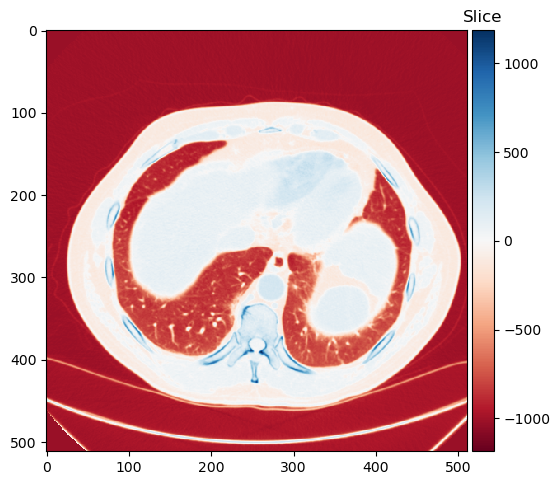

1185
-1024


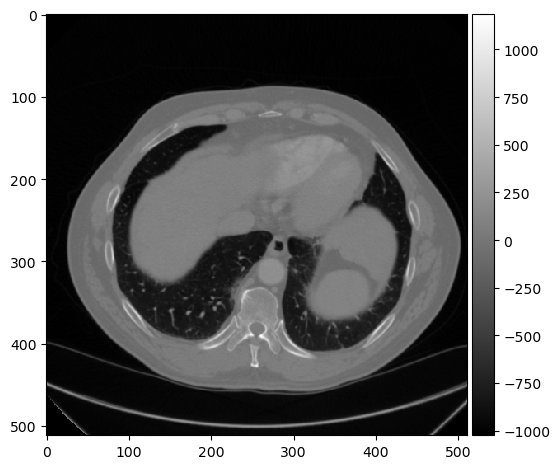

In [57]:
in_dir = "/Users/jordan/Documents/GitHub/DTUImageAnalysis/exercises/ex1-IntroductionToImageAnalysis/data/"
im_name = "1-442.dcm"
ds = dicom.dcmread(in_dir + im_name)
#print(ds)
im = ds.pixel_array
print(im.shape)
print(im.dtype)
io.imshow(im)
plt.title('Slice')
io.show()
raw = np.asarray(im)
maximum = np.max(raw)
minimum = np.min(raw)
print(maximum)
print(minimum)
io.imshow(im, vmin=-1024, vmax=1185, cmap='gray')
io.show()